# DS 3000 HW 5 

Due: Sunday July 21st @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file and the a `PDF` file included with the coding results to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope. 

**Notice that this is a group assignment. Each group only need to submit one copy and when you submit the work, please include everyone in your group.**

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Project proposal

For this course, we aim to complete a data analysis project about the the game [Palworld](https://en.wikipedia.org/wiki/Palworld). To help you start with the project, here are a couple of things you need to consider and work on to get a clean data for later analysis. 

To start with the project, please take some time to get familiar with the game. You don't need to play it but please at least know the basic terminologies, like what is a Pal. (And also, if you do play it, please do not spend too much time on it.)

The two recommended database is [https://palworld.gg/](https://palworld.gg/) and [https://paldb.cc/en/](https://paldb.cc/en/). You can use either, or both, or some other database about the Palworld. 

### Part 1.1 (10 points)

Please list 2-3 questions you may be interested to study with the Palworld database. It can be anything related in the game, like the Pals, items or constructions. Some potential question structures can be: 
- Are `A` and `B` related? How they are related?
- Which features may affect `C`'s change?
- If I need a higher `D`, which features may have a lower/higher value?
- Based on `E` and `F`, which items/pals are similar?
- I need to predict the value for `G`, which features I need to consider?

1. What factors influence the rarity of a PAL?
2. Which types of work are the most common?
3. Which element has the rarest PAL's?

### Part 1.2 (20 points)

Based on the questions we proposed in the part 1.1, what features we may need to include in the analysis? Check the websites, which website has those information? **You need to pick at least 8 features for analysis.** We recommend a mix of numerical (numbers etc.) and categorical (level etc.) features. Is there any other features that you think it may be important but hard to extract or find on the website (can be something in or not in the game)?

1. Rarity
2. Element type
3. Work type
4. Abilities
5. Stats
6. Size
7. names
8. Index (numerical identifier)

### Part 1.3 (20 points)

Suppose you do have all the features you mentioned in part 1.2. List 3-4 data visulizations you can make with those features. You do not need to make those visulizations here. Just describe the type of the visualizations (histogram, scatter plot etc. ), which features are involved, will there any hover data or color being added, and **discuss how these data visualizations may be related (or even answer) to your questions in part 1.1**. 

1. Histogram representing work type frequencies. We would use the work type feature
2. Scatterplots for each stat, which graphs the stat against the rarity of each PAL. We would use this to see which stat has the highest coorelation to rarity. This visualization would use the stats, rarity, names, and index features.
3. A pi-chart which visualizes the average rarity of PAL for each element type. This visualization will use the element type and rarity features. 

### Part 1.4  (50 points)

Now, go ahead and try to scrape the features you need. 

Please show all the codes you have for web scrapping. Your current output data frame should include at least 4 features. (You do not need to finish all at this moment, although it is recommend to start earlier). **Please design your code in pipeline and clearly document each function.** See the Python Style Guide in Week 1 for proper documentation. It is also recommended to save the data you have scrapped. 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re


# Initializes lists
name_list = []
rarity_list = []
rarity_level_list = []
element_list = []
work_list = []
hp_list = []
defense_list = []
price_list = []

# Dictionary to convert html string to element type
element_dict = {
     "elm1  element" : 'ice',
     "elm2  element" : 'dark',
     "elm3  element" : 'dragon',
     "elm4  element" : 'earth',
     "elm5  element" : 'leaf',
     "elm6  element" : 'electricity',
     "elm7  element" : 'water',
     "elm8  element" : 'fire',
     "elm9  element" : 'normal'
}


In [2]:
# Gets the data from an individual pals webpage
def get_pal_data(html):
    """ scrapes the hp defense and price from a pals webpage
    
    Args:
        html (str): html text object from the pals page
        
    Returns:
        extracted_data: a list containing the pals hp, defense and price
    
    """
    soup = BeautifulSoup(html, 'html.parser')

    extracted_data = []
    keys = ['HP', 'Defense', 'Price']

    counter = 1
    for stat in soup.find_all('div', class_ = 'value'):
        if counter > 6:
            break
        if counter == 1 or counter == 2 or counter == 6:
            value = stat.get_text()
            extracted_data.append(value)
        counter += 1
    return extracted_data

In [3]:
def generate_pal_df(url):
    """ scrapes the given url for pal data and creates a datafram with the data
    
    Args:
        url (str): url leading to the palworld site
        
    Returns:
        df (dataframe): a dataframe containing all the relevant data for each pal
    
    """
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')  

    # Traverses all the pals in the database
    for pal in soup.find_all('div', class_ = 'pal'):
        pal_elements = []
        pal_work_types = []
        pal_work_levels = []

        # Iterates all the pals to find the name of each pal
        for name in pal.find_all('div', class_ = 'name'):
            if not name.find_parent('div', class_='rarity'):
                name = name.get_text()
                name_list.append(name)

        # Iterates all the pals to find the rarity of each pal
        for rarity in pal.find_all('div', class_ = 'rarity'):
            for name in rarity.find_all('div', class_ = 'name'):
                    rarity = name.get_text()
                    rarity_list.append(rarity)

        # Iterates all the pals to find the rarity level of each pal
        for rarity_level in pal.find_all('div', class_ = 'rarity'):
            for lvl in rarity_level.find_all('div', class_ = 'lv'):
                rarity = lvl.get_text().strip()  # Strip any leading/trailing whitespace
                rarity_int = int(rarity)  # Convert the string to an integer
                rarity_level_list.append(rarity_int)

        # Iterates all the pals to find the name of element or elements of each pal
        for element in pal.find_all('div', class_ = 'element'):
            img_tag = element.find('img')
            element_key = img_tag['alt']
            pal_elements.append(element_dict[element_key]) 
        
        # Iterates all the pals to find all the work types associated with each pal
        for work_type in pal.find_all('div', class_ = 'w'):
            img_tag = work_type.find('img')
            work_type = img_tag['alt']
            pal_work_types.append(work_type)

        # Iterates all the pals to find the level of each work type for each pal
        for level in pal.find_all('div', class_ = 'level'): 
            all_levels = level.get_text()    
            pal_work_levels.append(all_levels)

        # Filters the work levels to get rid of all the zeros
        filtered_pal_work_level = list(filter(lambda num: num != '0', pal_work_levels))
        
        # Merges the work type with its corresponding level
        merged_work_level = [] 
        for a, b in zip(pal_work_types, filtered_pal_work_level): 
            merged_work_level.append(f"{a} {b}")

        element_list.append(pal_elements)
        work_list.append(merged_work_level)

        #extracts the data for each individual pal
        base_url = "https://palworld.gg/"
        for link in pal.find_all("a"):
            href = link['href']
            full_url = base_url + href
            html = requests.get(full_url).text
            
            stats = get_pal_data(html)
            intStats = [eval(i) for i in stats]
            hp_list.append(intStats[0])
            defense_list.append(intStats[1])
            price_list.append(intStats[2])


    # Removes the last empty list for the work_list and element_list
    work_list.pop()
    element_list.pop()

        
    # Creates the data frame for all the features of each pal
    df = pd.DataFrame({
            'name': name_list,
            'rarity': rarity_list,
            'rarity level': rarity_level_list,
            'elements': element_list,
            'work types': work_list,
            'hp': hp_list,
            'defense': defense_list,
            'price': price_list
        })
    
    return df

In [4]:
url = 'https://palworld.gg/pals'
df = generate_pal_df(url)
df.to_csv('pals_data.csv')


In [5]:
df.head(10)

,name,rarity,rarity level,elements,work types,hp,defense,price
0,Anubis #100,Epic,10,[earth],"[Handiwork 4, Mining 3, Transporting 2]",120,100,4960
1,Arsox #42,Common,4,[fire],"[Deforesting 1, Kindling 2]",85,95,3520
2,Astegon #98,Epic,9,"[dragon, dark]","[Handiwork 1, Mining 4, Oil Extracting 3]",100,125,8200
3,Azurobe #82,Rare,7,"[water, dragon]",[Watering 3],110,100,5600
4,Beakon #73,Rare,6,[electricity],"[Gathering 1, Generating Electricity 2, Transp...",105,80,7490
5,Beegarde #50,Common,4,[leaf],"[Gathering 1, Deforesting 1, Handiwork 1, Farm...",80,90,1880
6,Bellanoir #112,Legendary,20,[dark],"[Handiwork 2, Medicine Production 4, Transport...",120,100,10030
7,Bellanoir Libero #112,Legendary,20,[dark],"[Handiwork 2, Medicine Production 4, Transport...",120,100,10030
8,Blazamut #96,Epic,9,[fire],"[Kindling 3, Mining 4]",100,120,10520
9,Blazamut Ryu #96,Epic,10,"[dragon, fire]","[Kindling 3, Mining 4]",105,125,10520


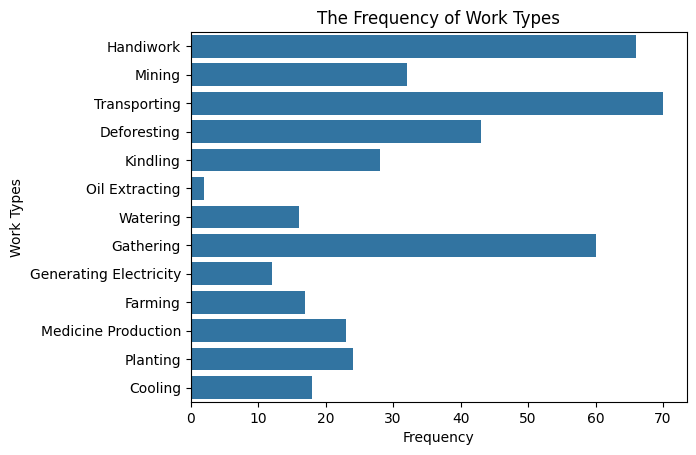

In [6]:
def plot_work_type_frequencies(df):
    """
    Plots a bar graph of the frequecies of the work types based on the input dataframe

    Args:
        df (pd.DataFrame): A Data Frame that contains a column called 'work types' that contains the PAL's work type

    Returns:
        Bar Graph showing the frequencies of the work type within the PALs world

    """
    # Gets all the work types and removes the levels
    all_work_types = []
    for sublist in df['work types']:
        for work in sublist:
            only_work_type = re.sub(r'\d+', '', work).strip()
            all_work_types.append(only_work_type)
    # Creates a Data frame for the work types
    work_types_df = pd.DataFrame(all_work_types, columns=['work_type'])

    # Plotting histogram for work type frequencies
    sns.countplot(y=work_types_df['work_type'])
    plt.title('The Frequency of Work Types')
    plt.xlabel('Frequency')
    plt.ylabel('Work Types')
    plt.show()

# Creates the bar graph with the PALS datafram
plot_work_type_frequencies(df)

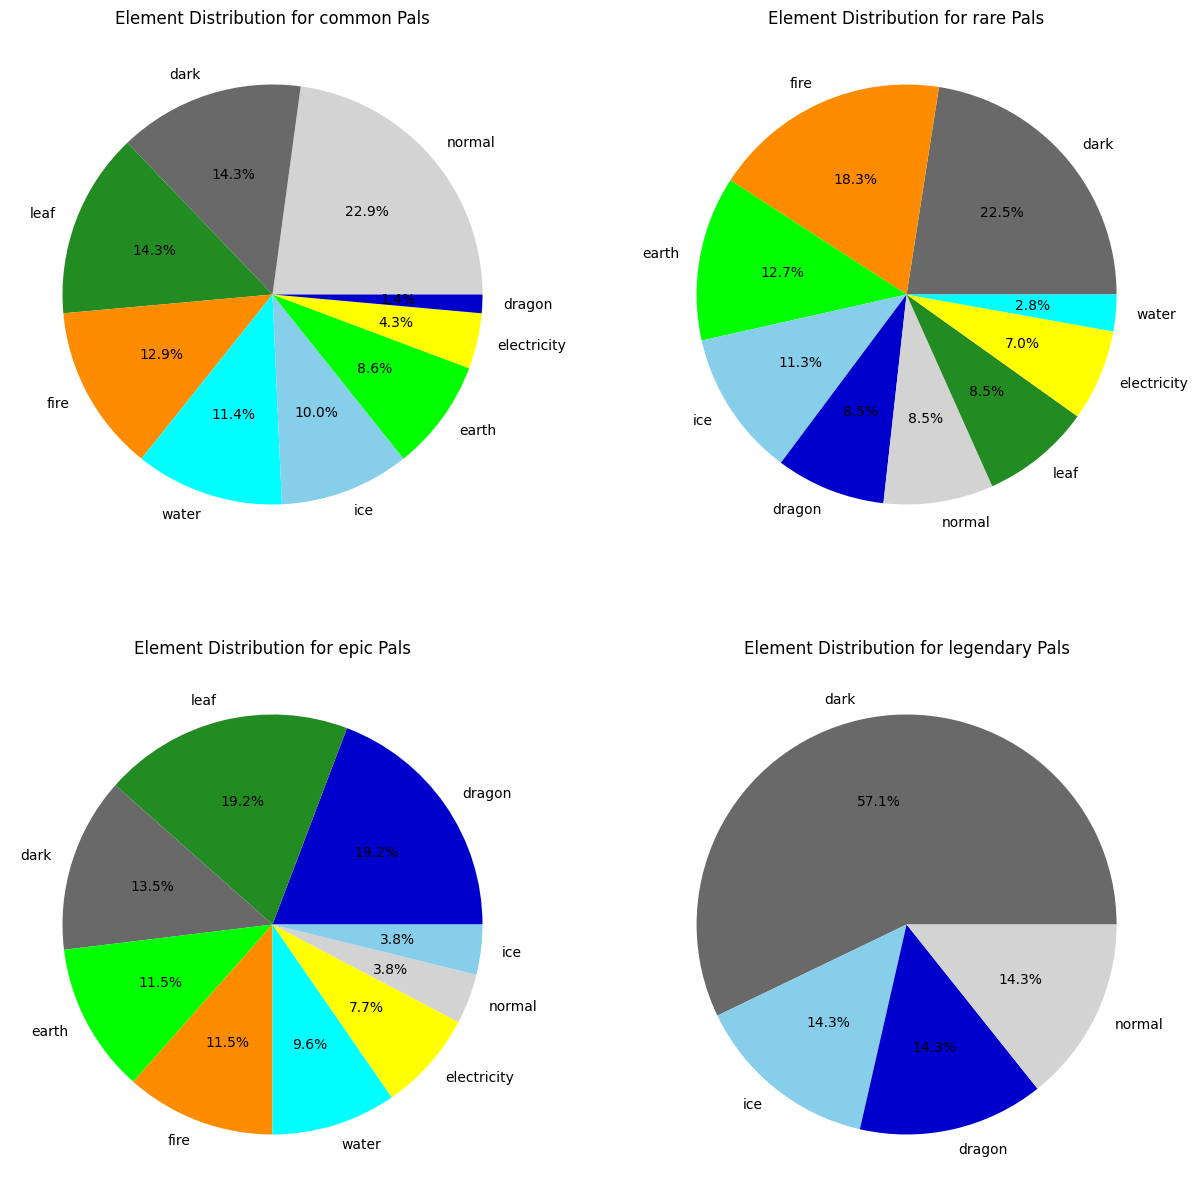

In [7]:
def plot_element_distribution_by_rarity(df):
    """ Plots pie charts showing the percentage of Pals of each element for each rarity.
    Args:
        df (pd.DataFrame): DataFrame that contains a column called 'elements' that contains the PAL's elements and 'rarity' that contains the PAL's rarety
    Returns:
        4 pie charts what shows the Element Distribution for each rarity for all the PALs
    """

    # Define all the rarety levels possible for a PAL
    rarity_levels = ['common', 'rare', 'epic', 'legendary']

    # Define a the colors for each availble element 
    element_colors = {
        'normal': 'lightgrey',
        'water': 'aqua',
        'fire': 'darkorange',
        'leaf': 'forestgreen',
        'dark': 'dimgray',
        'dragon': 'mediumblue',
        'earth': 'lime',
        'ice': 'skyblue',
        'electricity': 'yellow'
    }

# craetes the plot size 
    plt.figure(figsize=(15, 15))

    # iterates over each rarety level of the PALS
    for _, rarity in enumerate(rarity_levels):
        elements_list = []

        # iterates over each row in the given Data frame
        for index, row in df.iterrows():

            # checks if the rarety of the row mataches the first rarety level loop then adds to the list if true
            if row['rarity'].lower() == rarity:
                elements_list.extend(row['elements'])

        #Calculates the percent of the element per rarety
        element_counts = pd.Series(elements_list).value_counts(normalize=True) * 100

    # loops each element in the dictionary and gets the color and adds it to the list
        colors = []
        for element in element_counts.index:
            colors.append(element_colors[element])

        # creates the subplots and the pie chart
        plt.subplot(2, 2, _ + 1)
        plt.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%', colors=colors)
        plt.title(f'Element Distribution for {rarity} Pals')

    plt.show()
# Runs the function based on our PALs dataframe
plot_element_distribution_by_rarity(df)

Rarety on the Y axis, a stat on the 

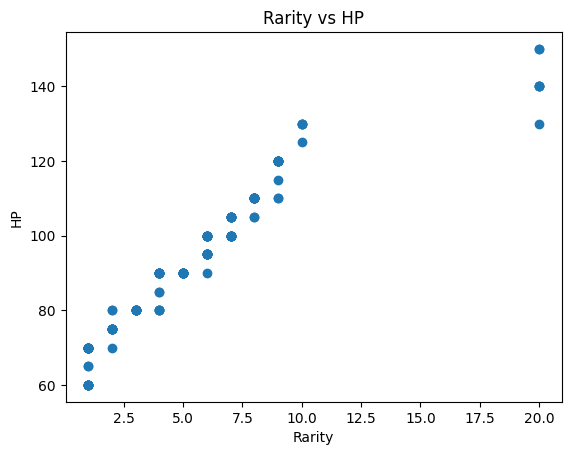

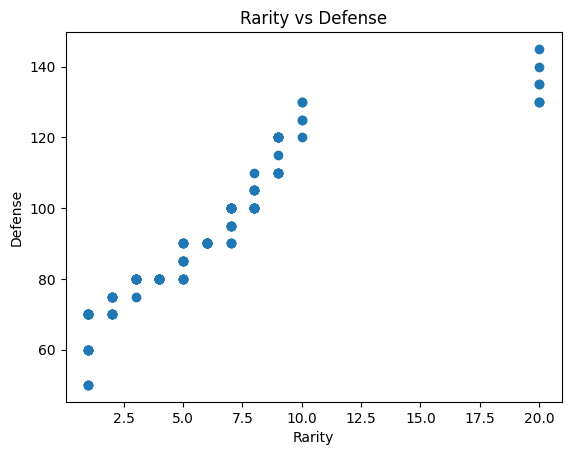

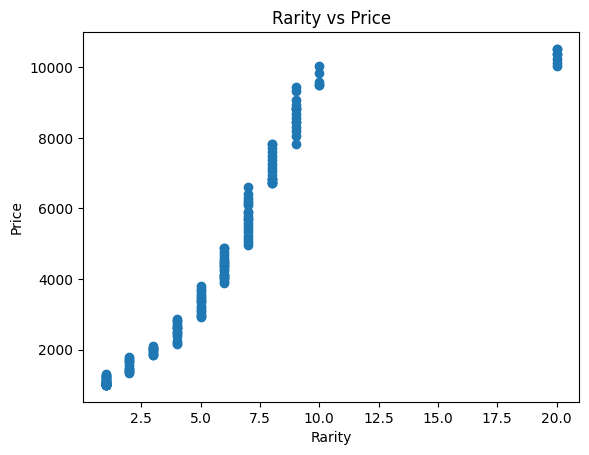

In [16]:
import matplotlib.pyplot as plt


def create_scatter_plots(data):
    """
    Creates scatter plots for comparing rarity with HP, defense, and price of Pals.
    
    Args:
    data (DataFrame): The DataFrame containing Pal data with columns for rarity, hp, defense, and price.
    
    Returns:
        Three scatter plots:
            1. Rarity vs HP
            2. Rarity vs Defense
            3. Rarity vs Price
    """
    # Sort the data by hp, defense, and price to ensure correct order
    data_sorted_hp = data.sort_values(by='hp', ascending=True)
    data_sorted_level = data.sort_values(by='rarity level', ascending=True)
    data_sorted_defense = data.sort_values(by='defense', ascending=True)
    data_sorted_price = data.sort_values(by='price', ascending=True)

    # Create a scatter plot for rarity vs HP
    plt.scatter(data_sorted_level['rarity level'], data_sorted_hp['hp'])
    plt.title('Rarity vs HP')
    plt.xlabel('Rarity')
    plt.ylabel('HP')
    plt.show()
    
    # Create a scatter plot for rarity vs Defense
    plt.scatter(data_sorted_level['rarity level'], data_sorted_defense['defense'])
    plt.title('Rarity vs Defense')
    plt.xlabel('Rarity')
    plt.ylabel('Defense')
    plt.show()
    
    # Create a scatter plot for rarity vs Price
    plt.scatter(data_sorted_level['rarity level'], data_sorted_price['price'])
    plt.title('Rarity vs Price')
    plt.xlabel('Rarity')
    plt.ylabel('Price')
    plt.show()

# Runs the funciton based on the PALs dataframe
create_scatter_plots(df)
